<a href="https://colab.research.google.com/github/celelunar/Text-Multiclass-Classification-LSTM/blob/main/Multiclass%20Classification%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Diva Nabila Henryka
<br>
ID: 2501975620

---

## Import and Install Needed Libraries
There are, in total, 8 libraries used in this multi-class classification task. Those libraries are:
1. Pandas - to do DataFrame manipulation.
2. Numpy - to do arrays manipulation.
3. Regular Expression (RE) - to check if a string matches the given regular expression and to substitue it (remove punctuations, numbers, extra whitespaces, etc.)
4. Unidecode - to normalize any accents characters.
5. NLTK
  * punkt - to tokenize sentences and words.
  * word_tokenize - to tokenize a string into words.
  * stopwords - to provide a list of common stopwords, which then will be removed from the text articles.
  * WordNetLemmatizer - to lemmatize or reducing words to their base form.
6. Scikit-Learn (sklearn)
  * train_test_split - to split dataset into random train and test subsets.
  * classification_report - to generate a report of classification metrics of the model's performance
  * accuracy_score, recall_score, precision_score, f1_score - to compute classification metrics.
7. Gensim
  * Word2Vec - to represent texts into a set of context vectors.
8. TensorFlow - to use Keras API (tensorflow.keras).
  * .text
    * Tokenizer - to split string into words, then convert them to numerical sequences.
  * .sequence
    * pad_sequences - to ensure that all text sequences have the same length.
  * .layers - to provide neural network building blocks, such as: Dense, Embedding, Activation, Flatten, BatchNormalization, Dropout.
  * .initializers
    * Constant - to assging a constant value to all weights in a layer.



In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 8.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import re
import unidecode

import nltk
from nltk import punkt
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score

import gensim
from gensim.models import Word2Vec

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.initializers import Constant
from tensorflow.keras.layers import Dense, Embedding, Activation, Flatten, BatchNormalization, Dropout

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Text Preprocessing

#### Read the Data
First I've uploaded the .csv file into the Google Colaboratory File System, then to read the dataset, I'll be employing the pandas library function:
``` pd.read_csv() ```

In [ ]:
df = pd.read_csv('train_data.csv')
df.head()

,text,label
0,Here are Thursday's biggest analyst calls: App...,0
1,Buy Las Vegas Sands as travel to Singapore bui...,0
2,"Piper Sandler downgrades DocuSign to sell, cit...",0
3,"Analysts react to Tesla's latest earnings, bre...",0
4,Netflix and its peers are set for a ‘return to...,0


#### Text Cleaning
Several things to do in this step are:
* Convert all characters to lowercase;
* Remove URLs;
* Remove all words starting with dollar sign ("$");
* Remove numbers;
* Remove symbols and punctuations;
* Remove extra spaces;
* Remove leading or trailing whitespaces.

In [ ]:
def cleaning(text):
  # to lower case
  text_clean = text.str.lower()

  # to remove URLs
  text_clean = [re.sub(r'http\S+', '', i) for i in text_clean]

  # to remove words starting with dollar sign ("$")
  text_clean = [re.sub(r'[$]\w+', ' ', i) for i in text_clean]

  # to remove numbers
  text_clean = [re.sub(r"\d+", "",i ) for i in text_clean]

  # to remove symbols
  text_clean = [re.sub(r'[^\w]', ' ', i) for i in text_clean]

  # to remove extra spaces
  text_clean = [re.sub(r'\s+', ' ', i) for i in text_clean]

  # to remove leading or trailing whitespaces
  text_clean = [i.strip() for i in text_clean]

  return text_clean

In [ ]:
cleaned = cleaning(df['text'])

#### Insert the Cleaned Text into the DataFrame
After cleaning the texts, I'll be inserting it to the DataFrame as "clean_text" using ```.insert()``` function from the Pandas library.

In [ ]:
df.insert(1, 'clean_text', cleaned)
df.head()

,text,clean_text,label
0,Here are Thursday's biggest analyst calls: App...,here are thursday s biggest analyst calls appl...,0
1,Buy Las Vegas Sands as travel to Singapore bui...,buy las vegas sands as travel to singapore bui...,0
2,"Piper Sandler downgrades DocuSign to sell, cit...",piper sandler downgrades docusign to sell citi...,0
3,"Analysts react to Tesla's latest earnings, bre...",analysts react to tesla s latest earnings brea...,0
4,Netflix and its peers are set for a ‘return to...,netflix and its peers are set for a return to ...,0


#### Split the Data into Training and Testing Set
The next part is splitting the data into 2 parts, 70% training set and 30% testing set. To do so we can use the ```train_test_split``` function from sklearn library.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size = 0.3, random_state = 42, stratify = df['label'])

In [ ]:
print("Training Data: ", len(x_train))
print("Testing Data:", len(x_test))

Training Data:  11893
Testing Data: 5097


#### Character Normalization, Tokenization, Lemmatization, and Remove Stop Words (Filtering)
The last part of text preprocessing is to normalize all characters that have accents on them, tokenize the strings into words, lemmatize the tokens (reduce words to their base form), and remove stop words in each iteration.

The reason why I choose to use lemmatization over stemming is because while stemming is also a great way to reduce word into its base form, it also risks the loss of meaning of said word as stemming may produce invalid words. Also stemming does not consider the context of the word in the sentence which may produce inaccurate stems.

Also, I've only done the rest of text processing after data splitting is because I want to use the training data subset as the guideline for modelling, not the whole dataset.

In [ ]:
lemma = WordNetLemmatizer()

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
for i in range(len(x_train)):
  text = x_train.iloc[i]
  train_text = unidecode.unidecode(text)
  train_text = word_tokenize(train_text)
  train_text = [lemma.lemmatize(word, pos = "v") for word in train_text if word not in stop_words]
  x_train.iloc[i] = ' '.join(train_text)

## Text Representation - Word2Vec (Skip-gram)
As per the request given in the question, I'll set the sg parameter to 1 (Skip-gram) which basically predicts the context words surrounding the current word.


#### Skip-gram Model
Since the dataset is large, I'll also set the min_count to 5. This means that a word have to at least appear 5 times in the training data to be included in the vocabulary.

In [ ]:
x_train_list = [text.split() for text in x_train]
x_train_list

[['pre',
  'greenwich',
  'stock',
  'rise',
  'fda',
  'lift',
  'hold',
  'phase',
  'breast',
  'cancer',
  'trial'],
 ['castle', 'biosciences', 'honor', 'arizona', 'top', 'workplace', 'award'],
 ['bank',
  'korea',
  'double',
  'margin',
  'latest',
  'rate',
  'hike',
  'line',
  'global',
  'trend',
  'larger',
  'policy',
  'move',
  'step',
  'battle',
  'inflation',
  'run',
  'year',
  'high'],
 ['luum',
  'precision',
  'lash',
  'close',
  'fund',
  'round',
  'strategic',
  'institutional',
  'investors'],
 ['celsius',
  'network',
  'one',
  'world',
  'largest',
  'cryptocurrency',
  'lenders',
  'file',
  'bankruptcy',
  'follow',
  'wave',
  'digital',
  'asset',
  'company',
  'freeze',
  'assets'],
 ['intraday', 'break'],
 ['progressiveeps', 'revenue', 'b', 'miss'],
 ['pinnacle', 'finl', 'share', 'beat', 'q', 'estimate', 'yesterday'],
 ['new',
  'tool',
  'spiff',
  'enable',
  'simple',
  'self',
  'administration',
  'commission',
  'sales',
  'team'],
 ['billiona

In [ ]:
skipgram = gensim.models.Word2Vec(x_train_list, min_count = 5, vector_size = 100, window = 5, sg = 1)

In [ ]:
vocab = skipgram.wv.index_to_key
print(vocab)

['market', 'stock', 'say', 'new', 'earn', 'trade', 'announce', 'price', 'economy', 'inflation', 'bank', 'us', 'q', 'year', 'business', 'report', 'second', 'quarter', 'result', 'company', 'finance', 'call', 'invest', 'stockmarket', 'u', 'first', 'china', 'amp', 'share', 'uk', 'rate', 'energy', 'global', 'rise', 'financial', 'president', 'buy', 'see', 'may', 'time', 'beat', 'next', 'feed', 'growth', 'june', 'week', 'fund', 'investors', 'oil', 'expect', 'plan', 'high', 'billion', 'hold', 'gas', 'rat', 'group', 'take', 'revenue', 'raise', 'increase', 'interest', 'back', 'get', 'dividend', 'ceo', 'inc', 'point', 'via', 'one', 'make', 'could', 'deal', 'watch', 'supply', 'top', 'pre', 'cut', 'b', 'go', 'russia', 'economic', 'end', 'data', 'open', 'declare', 'service', 'month', 'hike', 'risk', 'accord', 'sales', 'higher', 'look', 'eps', 'day', 'million', 'est', 'break', 'july', 'biden', 'offer', 'set', 'firm', 'capital', 'central', 'musk', 'launch', 'fall', 'move', 'big', 'recession', 'cost', 

In [ ]:
skipgram_dict = {}
for word in vocab:
  skipgram_dict[word] = skipgram.wv.get_vector(word)

skipgram_dict

{'market': array([-0.00841215,  0.16119015,  0.35807332,  0.17133091, -0.03369974,
        -0.26450253,  0.3082691 ,  0.40144646, -0.19178888, -0.13488983,
        -0.12513779, -0.57416195, -0.10149975, -0.10803609,  0.13862328,
        -0.1657677 ,  0.04933106, -0.19184187, -0.15382658, -0.32833356,
         0.16862331,  0.29552335,  0.1973163 , -0.19912194, -0.11750292,
         0.23368673, -0.316058  , -0.08866291, -0.16510397, -0.15348642,
         0.33874854, -0.09392547,  0.16612037, -0.40113306, -0.04584834,
        -0.08333042,  0.42175293,  0.01620949, -0.34218985, -0.03579055,
         0.25294465, -0.22699113, -0.32787088, -0.06056469,  0.0415542 ,
        -0.29257017, -0.09950773,  0.24257855,  0.18924356,  0.31940266,
         0.07637788, -0.19220579,  0.02940247,  0.26715794, -0.22142956,
         0.28059515,  0.12848504, -0.06536898, -0.12613745,  0.12659311,
        -0.18353511,  0.2204791 ,  0.49690035,  0.14714436, -0.2608629 ,
         0.44127843,  0.10685921,  0.2172

In [ ]:
# Number of words embeddings
print("Number of Key-Value Pairs: ", len(skipgram_dict))

Number of Key-Value Pairs:  3680


#### Text Tokenization
Create numerical representation of each word in the training list.

In [ ]:
word_token = Tokenizer()

In [ ]:
word_token.fit_on_texts(x_train_list)

#### Text Encoding
Encode each text in the training list into a sequence of numbers.

In [ ]:
encode_train = word_token.texts_to_sequences(x_train_list)

In [ ]:
encode_train

[[78, 3008, 2, 34, 449, 765, 52, 473, 3009, 571, 247],
 [5316, 1513, 2810, 3265, 77, 2188, 361],
 [11,
  1160,
  575,
  1514,
  149,
  33,
  86,
  227,
  31,
  652,
  1673,
  221,
  103,
  308,
  842,
  9,
  320,
  15,
  54],
 [9036, 2457, 9037, 105, 47, 492, 591, 2334, 43],
 [637,
  300,
  71,
  111,
  354,
  1294,
  1187,
  259,
  638,
  236,
  480,
  309,
  450,
  21,
  1255,
  420],
 [2335, 104],
 [9038, 55, 73, 175],
 [3579, 6532, 30, 41, 13, 321, 1409],
 [4, 766, 9039, 1410, 4003, 1674, 832, 938, 101, 400],
 [1041,
  4004,
  6533,
  391,
  686,
  118,
  1840,
  843,
  230,
  4005,
  989,
  609,
  3266,
  339,
  112,
  68],
 [11, 374, 4006, 53, 222, 576, 2189, 1561],
 [25, 2, 355, 117, 28, 123],
 [767, 260, 5317, 990, 139, 488],
 [9040,
  6534,
  6535,
  2336,
  9041,
  407,
  5318,
  1675,
  130,
  4542,
  663,
  9042,
  104,
  9043,
  4007,
  1,
  991,
  4,
  1021,
  9044,
  322,
  4008],
 [5319, 10, 1256, 860, 9045, 59],
 [516, 378, 1369, 337, 87, 545, 43, 1751, 67, 261, 577, 8

#### Text Embedding
Vocabulary size is set to be higher than the total words in the training data to account for words that does not appear in the training, but appear in the testing set.
<br>

Embedding dimension is set to 100, so that each word will be represented by a 100-dimensional vector in the embedding matrix to capture more complex relationship.
<br>

In each iteration, if the word in word_index tokenizer's dictionary is also in the skipgram model's dictionary then the embedding vector will be mapped into the embedding matrix.

In [ ]:
vocab_size = 35000
embed_dim = 100

In [ ]:
embed_matrix = np.zeros(shape=(vocab_size, embed_dim))

for word, i in word_token.word_index.items():
    embed_vector = skipgram_dict.get(word)
    if embed_vector is not None:
        embed_matrix[i] = embed_vector

#### Text Sequence Padding
This step is done to ensure the uniformity of each encoded text sequences' length. I'll fix length to the length of the longest text sequence.

In [ ]:
max_len =  df['clean_text'].str.split().str.len().max()

In [ ]:
pad_train = pad_sequences(encode_train, maxlen = max_len, padding = 'post')
pad_train.shape

(11893, 55)

In [ ]:
pad_train

array([[  78, 3008,    2, ...,    0,    0,    0],
       [5316, 1513, 2810, ...,    0,    0,    0],
       [  11, 1160,  575, ...,    0,    0,    0],
       ...,
       [8180, 2612,   38, ...,    0,    0,    0],
       [ 186, 1322,  115, ...,    0,    0,    0],
       [ 293,  415,   11, ...,    0,    0,    0]], dtype=int32)

## Classification Modelling

#### Prepare the Testing Data
This step is done by taking the same steps for the training data, which are:
* Normalization;
* Tokenization;
* Lemmatization;
* Stop words filtering;
* Text sequence tokenization;
* Text sequence encoding;
* Text sequence padding.

In [ ]:
for i in range(len(x_test)):
  text = x_test.iloc[i]
  test_text = unidecode.unidecode(text)
  test_text = word_tokenize(test_text)
  test_text = [lemma.lemmatize(word, pos = "v") for word in test_text if word not in stop_words]
  x_test.iloc[i] = ' '.join(test_text)

In [ ]:
x_test_list = [text.split() for text in x_test]
x_test_list

[['china',
  'strict',
  'covid',
  'lockdowns',
  'shrink',
  'economy',
  'threaten',
  'spread',
  'financial',
  'risk',
  'beyond',
  'property',
  'sector',
  'bloomberg',
  'china',
  'credit',
  'tracker',
  'show',
  'biggest',
  'risk',
  'lie'],
 ['china',
  'turn',
  'pariah',
  'global',
  'investors',
  'xi',
  'policies',
  'backfire'],
 ['low', 'float', 'move'],
 ['singapore',
  'tighten',
  'monetary',
  'policy',
  'economy',
  'grow',
  'q',
  'miss',
  'forecast'],
 ['oag',
  'deliver',
  'access',
  'entire',
  'flight',
  'lifecycle',
  'versatile',
  'data',
  'platform'],
 ['awake'],
 ['feed',
  'raise',
  'interest',
  'rat',
  'bps',
  'next',
  'week',
  'accord',
  'goldman',
  'sachs',
  'briansozzi'],
 ['goodness',
  'heart',
  'sam',
  'bankman',
  'fry',
  'year',
  'old',
  'billionaire',
  'founder',
  'ftx',
  'use',
  'moment',
  'crypto',
  'carnage',
  'expand',
  'already',
  'vast',
  'empire',
  'read',
  'big',
  'take'],
 ['tiktok', 'global', 

In [ ]:
word_token.fit_on_texts(x_test_list)

In [ ]:
encode_test = word_token.texts_to_sequences(x_test_list)

In [ ]:
encode_test

[[27,
  2843,
  140,
  970,
  1275,
  7,
  838,
  580,
  35,
  76,
  739,
  531,
  254,
  398,
  27,
  198,
  2367,
  136,
  157,
  76,
  1524],
 [27, 363, 6258, 31, 43, 841, 1037, 2564],
 [132, 1114, 103],
 [572, 505, 576, 221, 7, 197, 13, 175, 283],
 [8805, 433, 600, 1628, 761, 6450, 8806, 82, 239],
 [3511],
 [48, 64, 62, 65, 698, 42, 50, 85, 315, 458, 1400],
 [3866,
  1733,
  1658,
  1742,
  1509,
  15,
  776,
  1041,
  804,
  2593,
  166,
  1394,
  165,
  2344,
  151,
  550,
  2594,
  1840,
  339,
  112,
  68],
 [2025, 31, 461, 158, 308, 1761, 2043],
 [3804, 1829, 175, 41, 235],
 [14133, 1702, 4461, 99, 7, 14, 2],
 [244, 307, 2103, 5718, 2937, 3221, 224, 66, 109, 417, 15, 16],
 [612, 1951, 37, 16, 13, 19, 306, 1927, 3],
 [328,
  120,
  6492,
  484,
  573,
  140,
  296,
  148,
  358,
  262,
  861,
  57,
  182,
  1052,
  9,
  573,
  348,
  12,
  85,
  48,
  418],
 [162, 968, 246],
 [8527, 10, 4, 216, 101, 205, 8528, 8529, 807, 281, 641, 59],
 [1062, 880, 4375, 2432, 2053, 219, 239, 1

In [ ]:
pad_test = pad_sequences(encode_test, maxlen = max_len, padding = 'post')
pad_test.shape

(5097, 55)

In [ ]:
pad_test

array([[  27, 2843,  140, ...,    0,    0,    0],
       [  27,  363, 6258, ...,    0,    0,    0],
       [ 132, 1114,  103, ...,    0,    0,    0],
       ...,
       [  78,  421,  237, ...,    0,    0,    0],
       [1695, 2797,  301, ...,    0,    0,    0],
       [4308,    2,  238, ...,    0,    0,    0]], dtype=int32)

#### Base Model

In [ ]:
model = keras.Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embed_dim, input_length = max_len, embeddings_initializer = Constant(embed_matrix)))
model.add(layers.LSTM(64, input_shape = (None, None)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(20))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 55, 100)           3500000   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 20)                1300      
                                                                 
Total params: 3543796 (13.52 MB)
Trainable params: 3543668 (13.52 MB)
Non-trainable params: 128 (512.00 Byte)
_________________________________________________________________
None


In [ ]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              optimizer = "sgd",
              metrics = ["accuracy"]
)

In [ ]:
model.fit(pad_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
372/372 [==============================] - 27s 50ms/step - loss: 2.7896 - accuracy: 0.2098
Epoch 2/50
372/372 [==============================] - 5s 13ms/step - loss: 2.2588 - accuracy: 0.2950
Epoch 3/50
372/372 [==============================] - 3s 8ms/step - loss: 2.1407 - accuracy: 0.3078
Epoch 4/50
372/372 [==============================] - 3s 9ms/step - loss: 2.0850 - accuracy: 0.3236
Epoch 5/50
372/372 [==============================] - 3s 8ms/step - loss: 2.0493 - accuracy: 0.3273
Epoch 6/50
372/372 [==============================] - 3s 8ms/step - loss: 2.0129 - accuracy: 0.3351
Epoch 7/50
372/372 [==============================] - 3s 7ms/step - loss: 1.9981 - accuracy: 0.3454
Epoch 8/50
372/372 [==============================] - 2s 7ms/step - loss: 1.9703 - accuracy: 0.3584
Epoch 9/50
372/372 [==============================] - 2s 7ms/step - loss: 1.9434 - accuracy: 0.3649
Epoch 10/50
372/372 [==============================] - 3s 9ms/step - loss: 1.9181 - accuracy: 0.3

##### Base Model's Evaluation

In [ ]:
predict = model.predict(pad_test)

160/160 [==============================] - 1s 3ms/step


In [ ]:
predict_classes = np.argmax(predict, axis = 1)

In [ ]:
print(classification_report(y_test, predict_classes))

              precision    recall  f1-score   support

           0       0.13      0.10      0.12        77
           1       0.84      0.74      0.79       251
           2       0.75      0.65      0.70      1063
           3       0.16      0.19      0.17        96
           4       0.98      0.88      0.93       108
           5       0.98      0.91      0.94       296
           6       0.40      0.78      0.53       157
           7       0.70      0.79      0.75       187
           8       0.27      0.28      0.27        50
           9       0.49      0.49      0.49       467
          10       0.00      0.00      0.00        21
          11       0.00      0.00      0.00        13
          12       0.83      0.45      0.58       146
          13       0.53      0.48      0.50       141
          14       0.55      0.67      0.61       547
          15       0.60      0.72      0.65       150
          16       0.86      0.82      0.84       296
          17       0.84    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:
- The overall accuracy of the model is 66% which means that the model prediction is correct around 66% of all testing data.

<br>

Averaged Scores:
- The macro average (0.57) is lower than the weighted average (0.68). This indicates that the model performs better on classes with more data points (weighted average) compared to giving equal weight to each class (macro average). This might be because the model is trained on imbalanced data, where some classes have significantly fewer examples.

<br>

Precision:
- Out of all text that the model predicted to have '0' as the label, 13% of them actually categorized as '0'.
- Out of all text that the model predicted to have '1' as the label, 84% of them actually categorized as '1'.
- Out of all text that the model predicted to have '2' as the label, 75% of them actually categorized as '2'.
- Out of all text that the model predicted to have '3' as the label, 16% of them actually categorized as '3'.
- Out of all text that the model predicted to have '4' as the label, 98% of them actually categorized as '4'.
- Out of all text that the model predicted to have '5' as the label, 98% of them actually categorized as '5'.
- Out of all text that the model predicted to have '6' as the label, 40% of them actually categorized as '6'.
- Out of all text that the model predicted to have '7' as the label, 70% of them actually categorized as '7'.
- Out of all text that the model predicted to have '8' as the label, 27% of them actually categorized as '8'.
- Out of all text that the model predicted to have '9' as the label, 49% of them actually categorized as '9'.
- Out of all text that the model predicted to have '10' as the label, 0% of them actually categorized as '10'.
- Out of all text that the model predicted to have '11' as the label, 0% of them actually categorized as '11'.
- Out of all text that the model predicted to have '12' as the label, 83% of them actually categorized as '12'.
- Out of all text that the model predicted to have '13' as the label, 53% of them actually categorized as '13'.
- Out of all text that the model predicted to have '14' as the label, 55% of them actually categorized as '14'.
- Out of all text that the model predicted to have '15' as the label, 60% of them actually categorized as '15'.
- Out of all text that the model predicted to have '16' as the label, 86% of them actually categorized as '16'.
- Out of all text that the model predicted to have '17' as the label, 84% of them actually categorized as '17'.
- Out of all text that the model predicted to have '18' as the label, 67% of them actually categorized as '18'.
- Out of all text that the model predicted to have '19' as the label, 80% of them actually categorized as '19'.



<br>

Recall:
- Out of all text that actually categorized as '0', the model predicted it correctly for 10% of them.
- Out of all text that actually categorized as '1', the model predicted it correctly for 74% of them.
- Out of all text that actually categorized as '2', the model predicted it correctly for 65% of them.
- Out of all text that actually categorized as '3', the model predicted it correctly for 19% of them.
- Out of all text that actually categorized as '4', the model predicted it correctly for 88% of them.
- Out of all text that actually categorized as '5', the model predicted it correctly for 91% of them.
- Out of all text that actually categorized as '6', the model predicted it correctly for 78% of them.
- Out of all text that actually categorized as '7', the model predicted it correctly for 79% of them.
- Out of all text that actually categorized as '8', the model predicted it correctly for 28% of them.
- Out of all text that actually categorized as '9', the model predicted it correctly for 49% of them.
- Out of all text that actually categorized as '10', the model predicted it correctly for 0% of them.
- Out of all text that actually categorized as '11', the model predicted it correctly for 0% of them.
- Out of all text that actually categorized as '12', the model predicted it correctly for 45% of them.
- Out of all text that actually categorized as '13', the model predicted it correctly for 48% of them.
- Out of all text that actually categorized as '14', the model predicted it correctly for 67% of them.
- Out of all text that actually categorized as '15', the model predicted it correctly for 72% of them.
- Out of all text that actually categorized as '16', the model predicted it correctly for 82% of them.
- Out of all text that actually categorized as '17', the model predicted it correctly for 58% of them.
- Out of all text that actually categorized as '18', the model predicted it correctly for 78% of them.
- Out of all text that actually categorized as '19', the model predicted it correctly for 54% of them.


<br>

F1 Score:
- Poor Performance ( <= 0.25 ): 0, 3, 10, and 11.
- Fair Performance ( 0.26 - 0.50 ): 8, 9, and 13.
- Good Performance ( 0.51 - 0.75 ): 2, 6, 7, 12, 14, 15, 17, 18, and 19.
- Excellent Performance ( >= 0.76): 1, 4, 5, and 16.



#### Tuned Model
Few changes made are:
* LSTM Units from 64 to 128;
* Optimzer from SGD (Stochastic Gradient Descent) to Adam (Adaptive Moment Estimation).


In [ ]:
tuned_model = keras.Sequential()
tuned_model.add(Embedding(input_dim = vocab_size, output_dim = embed_dim, input_length = max_len, embeddings_initializer = Constant(embed_matrix)))
tuned_model.add(layers.LSTM(128, input_shape = (None, None)))
tuned_model.add(layers.BatchNormalization())
tuned_model.add(layers.Dense(20))
print(tuned_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 55, 100)           3500000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 20)                2580      
                                                                 
Total params: 3620340 (13.81 MB)
Trainable params: 3620084 (13.81 MB)
Non-trainable params: 256 (1.00 KB)
_________________________________________________________________
None


In [ ]:
tuned_model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              optimizer = "adam",
              metrics = ["accuracy"]
)

In [ ]:
tuned_model.fit(pad_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
372/372 [==============================] - 23s 54ms/step - loss: 1.8254 - accuracy: 0.4434
Epoch 2/50
372/372 [==============================] - 6s 16ms/step - loss: 1.2524 - accuracy: 0.6235
Epoch 3/50
372/372 [==============================] - 5s 13ms/step - loss: 0.9622 - accuracy: 0.7147
Epoch 4/50
372/372 [==============================] - 4s 12ms/step - loss: 0.7067 - accuracy: 0.7927
Epoch 5/50
372/372 [==============================] - 3s 8ms/step - loss: 0.5562 - accuracy: 0.8410
Epoch 6/50
372/372 [==============================] - 3s 8ms/step - loss: 0.4455 - accuracy: 0.8741
Epoch 7/50
372/372 [==============================] - 3s 9ms/step - loss: 0.3599 - accuracy: 0.9024
Epoch 8/50
372/372 [==============================] - 3s 9ms/step - loss: 0.2860 - accuracy: 0.9252
Epoch 9/50
372/372 [==============================] - 3s 7ms/step - loss: 0.2530 - accuracy: 0.9352
Epoch 10/50
372/372 [==============================] - 3s 7ms/step - loss: 0.2389 - accuracy: 0

##### Tuned Model's Evaluation

In [ ]:
tuned__predict = tuned__model.predict(pad_test)

160/160 [==============================] - 1s 2ms/step


In [ ]:
tuned__predict_classes = np.argmax(tuned__predict, axis = 1)

In [ ]:
print(classification_report(y_test, tuned__predict_classes))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55        77
           1       0.79      0.83      0.81       251
           2       0.75      0.84      0.80      1063
           3       0.63      0.72      0.67        96
           4       0.97      0.95      0.96       108
           5       0.93      0.96      0.94       296
           6       0.82      0.78      0.80       157
           7       0.86      0.74      0.80       187
           8       0.64      0.74      0.69        50
           9       0.64      0.64      0.64       467
          10       0.47      0.43      0.45        21
          11       0.88      0.54      0.67        13
          12       0.85      0.79      0.82       146
          13       0.84      0.58      0.69       141
          14       0.80      0.76      0.78       547
          15       0.74      0.76      0.75       150
          16       0.84      0.84      0.84       296
          17       0.85    

Accuracy:
- The overall accuracy of the model is 77% which means that the model prediction is correct around 77% of all testing data.

<br>

Averaged Scores:
- The macro and weighted averages are very similar (0.76 and 0.77), indicating that the model performs consistently well across classes, regardless of the class distribution in the data.

<br>

Precision:
- Out of all text that the model predicted to have '0' as the label, 53% of them actually categorized as '0'.
- Out of all text that the model predicted to have '1' as the label, 79% of them actually categorized as '1'.
- Out of all text that the model predicted to have '2' as the label, 75% of them actually categorized as '2'.
- Out of all text that the model predicted to have '3' as the label, 63% of them actually categorized as '3'.
- Out of all text that the model predicted to have '4' as the label, 97% of them actually categorized as '4'.
- Out of all text that the model predicted to have '5' as the label, 93% of them actually categorized as '5'.
- Out of all text that the model predicted to have '6' as the label, 82% of them actually categorized as '6'.
- Out of all text that the model predicted to have '7' as the label, 86% of them actually categorized as '7'.
- Out of all text that the model predicted to have '8' as the label, 64% of them actually categorized as '8'.
- Out of all text that the model predicted to have '9' as the label, 64% of them actually categorized as '9'.
- Out of all text that the model predicted to have '10' as the label, 47% of them actually categorized as '10'.
- Out of all text that the model predicted to have '11' as the label, 88% of them actually categorized as '11'.
- Out of all text that the model predicted to have '12' as the label, 85% of them actually categorized as '12'.
- Out of all text that the model predicted to have '13' as the label, 84% of them actually categorized as '13'.
- Out of all text that the model predicted to have '14' as the label, 80% of them actually categorized as '14'.
- Out of all text that the model predicted to have '15' as the label, 74% of them actually categorized as '15'.
- Out of all text that the model predicted to have '16' as the label, 84% of them actually categorized as '16'.
- Out of all text that the model predicted to have '17' as the label, 85% of them actually categorized as '17'.
- Out of all text that the model predicted to have '18' as the label, 78% of them actually categorized as '18'.
- Out of all text that the model predicted to have '19' as the label, 66% of them actually categorized as '19'.



<br>

Recall:
- Out of all text that actually categorized as '0', the model predicted it correctly for 57% of them.
- Out of all text that actually categorized as '1', the model predicted it correctly for 83% of them.
- Out of all text that actually categorized as '2', the model predicted it correctly for 84% of them.
- Out of all text that actually categorized as '3', the model predicted it correctly for 72% of them.
- Out of all text that actually categorized as '4', the model predicted it correctly for 95% of them.
- Out of all text that actually categorized as '5', the model predicted it correctly for 96% of them.
- Out of all text that actually categorized as '6', the model predicted it correctly for 78% of them.
- Out of all text that actually categorized as '7', the model predicted it correctly for 74% of them.
- Out of all text that actually categorized as '8', the model predicted it correctly for 74% of them.
- Out of all text that actually categorized as '9', the model predicted it correctly for 64% of them.
- Out of all text that actually categorized as '10', the model predicted it correctly for 43% of them.
- Out of all text that actually categorized as '11', the model predicted it correctly for 54% of them.
- Out of all text that actually categorized as '12', the model predicted it correctly for 79% of them.
- Out of all text that actually categorized as '13', the model predicted it correctly for 58% of them.
- Out of all text that actually categorized as '14', the model predicted it correctly for 76% of them.
- Out of all text that actually categorized as '15', the model predicted it correctly for 76% of them.
- Out of all text that actually categorized as '16', the model predicted it correctly for 84% of them.
- Out of all text that actually categorized as '17', the model predicted it correctly for 65% of them.
- Out of all text that actually categorized as '18', the model predicted it correctly for 77% of them.
- Out of all text that actually categorized as '19', the model predicted it correctly for 62% of them.


<br>

F1 Score:
- Poor Performance ( <= 0.25 ): None.
- Fair Performance ( 0.26 - 0.50 ): 10.
- Good Performance ( 0.51 - 0.75 ): 3, 8, 9, 11, 13, 15, 17, and 19.
- Excellent Performance ( >= 0.76): 1, 2, 4, 5, 6, 7, 12, 14, 16, and 18.



## Summary
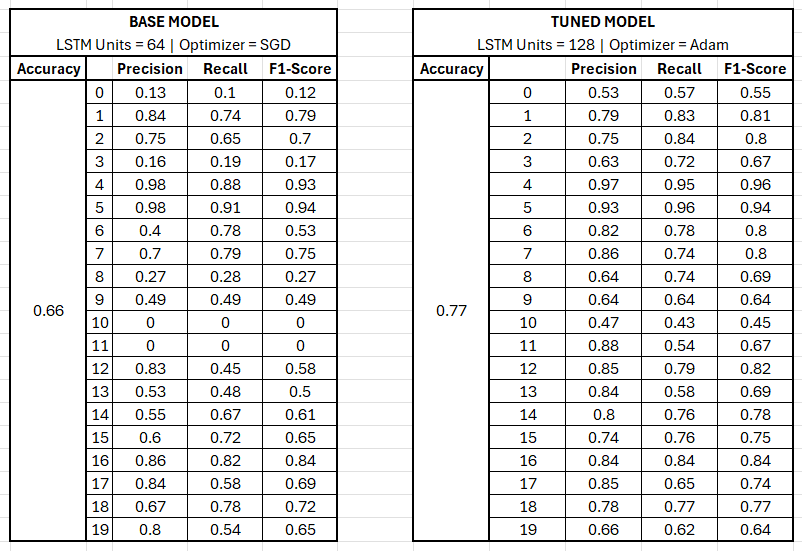


The tuned model shows a significant improvement in the overall accuracy by correctly classifying nearly 11% more data points than the base model.

While there are slight declining in some categories' evaluation metrics, the tuned model also successfully increases most categories' evaluation metrics giving a more balanced performance across the board.

Overall, the tuned model suggests a more robust and accurate predictions compared to the based model.